In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib
from datetime import datetime

In [171]:
df = pd.read_csv('../../datas/credit_card_purchases.csv')
df = df.dropna().reset_index(drop=True)

In [172]:
def to_hash(cc_num):
    return int(hashlib.sha256(cc_num.encode()).hexdigest(), 16) % 10**8

df['customer_id'] = df['cc_num'].astype('str').apply(to_hash)

In [173]:
df = df.drop(columns=['Unnamed: 0', 'cc_num', 'first', 'last', 'street', 'lat', 'long', 'trans_num', 'merchant'])

In [174]:
df['trans_date_trans_time'] = df['trans_date_trans_time'].str[:10]
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])
df = df.rename(columns={'trans_date_trans_time': 'trans_date'})

In [175]:
df['merch_zipcode'] = df['merch_zipcode'].astype('int')

In [176]:
def find_age(dob):
    today = datetime.today()
    age = today.year - dob.year

    if (today.month, today.day) < (dob.month, dob.day):
        age -= 1
    return age

df['age'] = df['dob'].apply(find_age)

In [177]:
df.head()

,trans_date,category,amt,gender,city,state,zip,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,customer_id,age
0,2019-01-01,misc_net,4.97,F,Moravian Falls,NC,28654,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0,28705,67709251,36
1,2019-01-01,entertainment,220.11,M,Malad City,ID,83252,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0,83236,29260595,62
2,2019-01-01,misc_pos,41.96,M,Doe Hill,VA,24433,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0,22844,50636118,38
3,2019-01-01,gas_transport,94.63,F,Dublin,PA,18917,2158,Transport planner,1961-06-19,1325376248,40.653382,-76.152667,0,17972,42522027,63
4,2019-01-01,gas_transport,71.65,M,Edinburg,VA,22824,6018,"Designer, multimedia",1947-08-21,1325376308,38.948089,-78.540296,0,22644,34306959,76


In [178]:
df = df.iloc[:, [13, 0, 15, 1, 2, 3, 16, 8, 9, 4, 5, 6, 7, 11, 12, 14, 10]]

In [179]:
df.head()

,is_fraud,trans_date,customer_id,category,amt,gender,age,job,dob,city,state,zip,city_pop,merch_lat,merch_long,merch_zipcode,unix_time
0,0,2019-01-01,67709251,misc_net,4.97,F,36,"Psychologist, counselling",1988-03-09,Moravian Falls,NC,28654,3495,36.011293,-82.048315,28705,1325376018
1,0,2019-01-01,29260595,entertainment,220.11,M,62,Nature conservation officer,1962-01-19,Malad City,ID,83252,4154,43.150704,-112.154481,83236,1325376051
2,0,2019-01-01,50636118,misc_pos,41.96,M,38,Dance movement psychotherapist,1986-03-28,Doe Hill,VA,24433,99,38.674999,-78.632459,22844,1325376186
3,0,2019-01-01,42522027,gas_transport,94.63,F,63,Transport planner,1961-06-19,Dublin,PA,18917,2158,40.653382,-76.152667,17972,1325376248
4,0,2019-01-01,34306959,gas_transport,71.65,M,76,"Designer, multimedia",1947-08-21,Edinburg,VA,22824,6018,38.948089,-78.540296,22644,1325376308


In [180]:
# misc_pos and misc_net most likely mean miscellaneous transactions made in person and online
df['category'].unique()

array(['misc_net', 'entertainment', 'misc_pos', 'gas_transport',
       'grocery_pos', 'shopping_net', 'shopping_pos', 'food_dining',
       'grocery_net', 'health_fitness', 'travel', 'kids_pets',
       'personal_care', 'home'], dtype=object)

In [181]:
# no fraud
df_nf = df[df['is_fraud'] == 0]
df_nf = df.drop(columns=['is_fraud'])


In [182]:
df_nf.sample()

,trans_date,customer_id,category,amt,gender,age,job,dob,city,state,zip,city_pop,merch_lat,merch_long,merch_zipcode,unix_time
794685,2020-01-07,30347331,food_dining,5.19,M,25,Clothing/textile technologist,1999-05-31,Tekoa,WA,99033,895,47.018083,-116.840641,83855,1357575478


In [183]:
df_nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100702 entries, 0 to 1100701
Data columns (total 16 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   trans_date     1100702 non-null  datetime64[ns]
 1   customer_id    1100702 non-null  int64         
 2   category       1100702 non-null  object        
 3   amt            1100702 non-null  float64       
 4   gender         1100702 non-null  object        
 5   age            1100702 non-null  int64         
 6   job            1100702 non-null  object        
 7   dob            1100702 non-null  datetime64[ns]
 8   city           1100702 non-null  object        
 9   state          1100702 non-null  object        
 10  zip            1100702 non-null  int64         
 11  city_pop       1100702 non-null  int64         
 12  merch_lat      1100702 non-null  float64       
 13  merch_long     1100702 non-null  float64       
 14  merch_zipcode  1100702 non-null  i

<Axes: xlabel='age', ylabel='Density'>

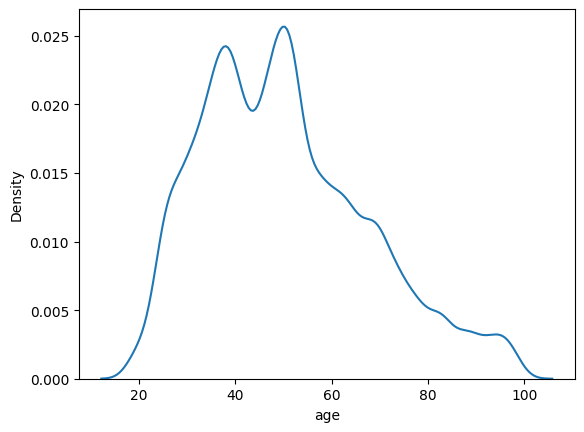

In [195]:
sns.kdeplot(x=df_nf['age'], bw_adjust=2)

<Axes: xlabel='amt', ylabel='Density'>

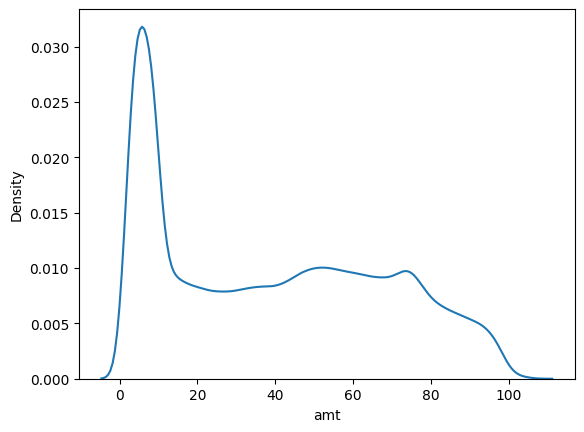

In [196]:
sns.kdeplot(x=df_nf['amt'])

<Axes: xlabel='age', ylabel='category'>

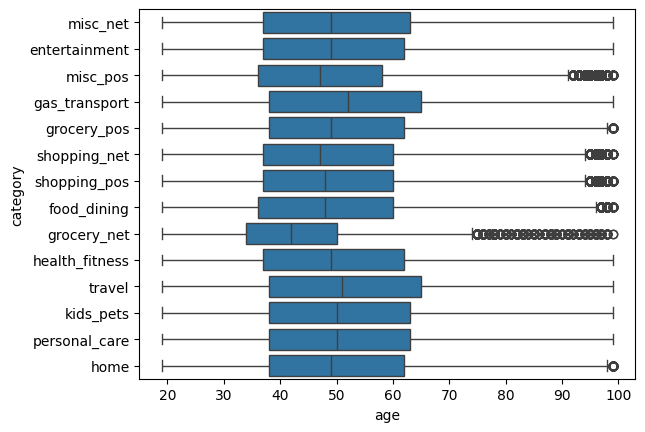

In [189]:
sns.boxplot(x='age', y='category', data=df_nf)

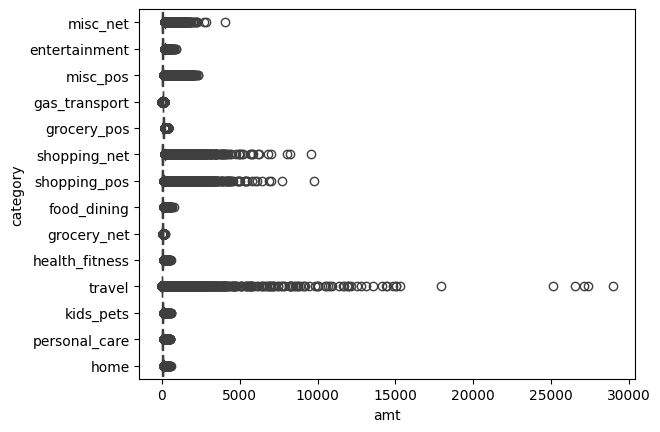

In [190]:
sns.boxplot(x='amt', y='category', data=df_nf)
plt.show()

In [191]:
def remove_outliers(group):
    Q1_age = group['age'].quantile(0.25)
    Q3_age = group['age'].quantile(0.75)
    IQR_age = Q3_age - Q1_age

    lower_bound_age = Q1_age - 1.5 * IQR_age
    upper_bound_age = Q3_age + 1.5 * IQR_age

    Q1_amt = group['amt'].quantile(0.25)
    Q3_amt = group['amt'].quantile(0.75)
    IQR_amt = Q3_amt - Q1_amt

    lower_bound_amt = Q1_amt - 1.5 * IQR_amt
    upper_bound_amt = Q3_amt + 1.5 * IQR_amt

    return group[(group['age'] >= lower_bound_amt) & (group['age'] <= upper_bound_amt) &
                 (group['amt'] >= lower_bound_age) & (group['amt'] <= upper_bound_age)]

In [192]:
df_nf = df_nf.groupby('category').apply(remove_outliers).reset_index(drop=True)

C:\Users\Anthony\AppData\Local\Temp\ipykernel_27444\4176687933.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_nf = df_nf.groupby('category').apply(remove_outliers).reset_index(drop=True)


<Axes: xlabel='age', ylabel='category'>

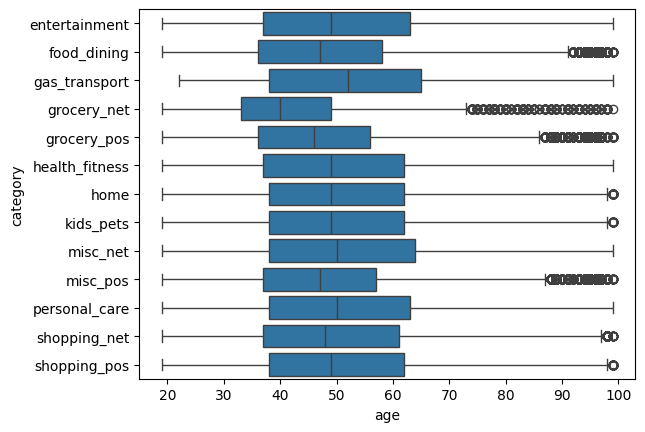

In [193]:
sns.boxplot(x='age', y='category', data=df_nf)

<Axes: xlabel='amt', ylabel='category'>

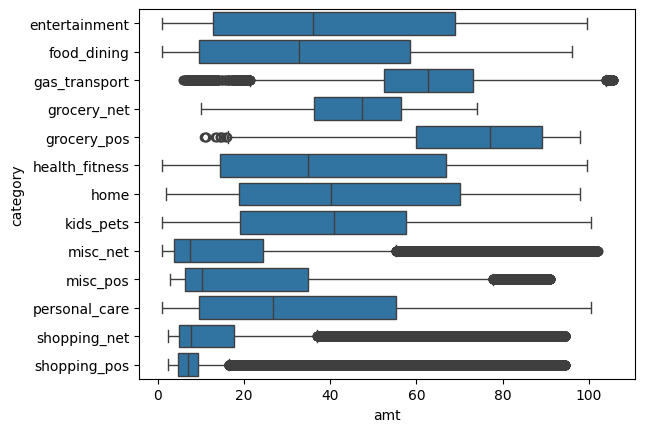

In [207]:
sns.boxplot(data=df_nf, x='amt', y='category')

In [208]:
df_nf

,trans_date,customer_id,category,amt,gender,age,job,dob,city,state,zip,city_pop,merch_lat,merch_long,merch_zipcode,unix_time
0,2019-01-01,43173217,entertainment,5.83,F,66,Exercise physiologist,1958-06-26,Brantley,AL,36009,2566,31.798954,-86.213243,36049,1325381006
1,2019-01-01,24991018,entertainment,7.06,F,88,Purchasing manager,1935-08-15,Hopewell,VA,23860,31970,37.426207,-76.502881,23061,1325381302
2,2019-01-01,44310448,entertainment,5.27,F,61,Pensions consultant,1962-10-16,Pomona,NY,10970,9993,41.788775,-74.471154,12740,1325383812
3,2019-01-01,87474173,entertainment,65.05,M,71,"Embryologist, clinical",1953-03-30,Clutier,IA,52217,590,41.388862,-91.844621,52359,1325384621
4,2019-01-01,12758842,entertainment,1.25,F,97,Hydrologist,1926-08-27,Ash Flat,AR,72513,2856,35.354207,-91.123965,72101,1325387560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825742,2020-06-21,67953539,shopping_pos,23.72,F,64,Landscape architect,1960-01-13,Cisco,IL,61830,478,40.988227,-87.782711,60964,1371814192
825743,2020-06-21,18228195,shopping_pos,3.40,F,75,Maintenance engineer,1949-03-20,Corsica,PA,15829,1274,40.378471,-79.135890,15923,1371814314
825744,2020-06-21,15552172,shopping_pos,3.59,F,57,Tax adviser,1967-05-05,Darien,GA,31305,5989,30.396833,-82.235630,31562,1371814912
825745,2020-06-21,32856643,shopping_pos,6.86,F,67,Pension scheme manager,1956-09-15,Grassflat,PA,16839,489,40.947333,-77.454622,16852,1371815810


In [218]:
df_nf['state'].value_counts()

state
PA    58959
TX    57322
NY    52811
OH    32602
IL    31107
AL    29870
CA    29544
MO    28886
MI    24954
AR    21600
VA    21579
KY    21178
MN    20797
NC    20545
IA    20473
SC    19987
IN    19936
WI    19660
OK    19600
MD    19028
WV    18842
FL    17969
GA    17519
NE    16704
NJ    16352
MS    15334
KS    15292
TN    12821
LA    12736
OR     9765
WA     9520
ME     9500
VT     8267
MA     8245
ND     8080
SD     7301
CO     7206
NM     7018
NH     6164
CT     5699
WY     5644
AZ     4431
MT     3975
UT     3163
DC     2542
ID     2534
NV     1971
HI      362
RI      352
DE        1
Name: count, dtype: int64

In [221]:
df_nf_grouped = df_nf.groupby(['state', 'category'])[['amt', 'age']].describe()

In [222]:
df_nf_grouped['age']

count       mean        std   min   25%   50%   75%  \
state category                                                              
AL    entertainment  2173.0  53.758399  14.563479  26.0  45.0  52.0  61.0   
      food_dining    2364.0  52.025381  13.800840  26.0  44.0  52.0  58.0   
      gas_transport  4025.0  53.472795  13.998414  26.0  45.0  52.0  61.0   
      grocery_net    1099.0  46.293904   9.663655  26.0  40.0  47.0  52.0   
      grocery_pos    2374.0  51.384583  13.652756  26.0  44.0  51.0  54.0   
...                     ...        ...        ...   ...   ...   ...   ...   
WY    misc_net        272.0  47.102941  10.416620  30.0  39.5  50.0  57.0   
      misc_pos        359.0  45.944290   8.475546  30.0  40.0  48.0  51.0   
      personal_care   449.0  46.171492  10.193638  30.0  38.0  48.0  51.0   
      shopping_net    381.0  46.249344  11.230985  30.0  38.0  43.0  51.0   
      shopping_pos    385.0  45.150649  10.340966  30.0  35.0  43.0  51.0   

                      max  
state category             
AL    entertainment  95.0  
      food_dining    95.0  
      gas_transport  95.0  
      grocery_net    95.0  
      grocery_pos    95.0  
...                   ...  
WY    misc_net       82.0  
      misc_pos       82.0  
      personal_care  82.0  
      shopping_net   82.0  
      shopping_pos   82.0  

[638 rows x 8 columns]

In [223]:
df_nf_grouped['amt']

count       mean        std    min     25%     50%  \
state category                                                             
AL    entertainment  2173.0  32.037975  27.222186   1.01   8.610  24.080   
      food_dining    2364.0  32.356806  26.791081   1.01   8.265  25.835   
      gas_transport  4025.0  65.687920  15.041488   7.19  55.430  65.230   
      grocery_net    1099.0  46.292730  14.278888  12.22  35.005  46.740   
      grocery_pos    2374.0  67.064103  18.826781  13.62  52.750  68.285   
...                     ...        ...        ...    ...     ...     ...   
WY    misc_net        272.0  23.672426  29.135848   1.01   4.400   8.220   
      misc_pos        359.0  24.574819  18.608543   3.00   7.735  25.530   
      personal_care   449.0  38.984432  28.934283   1.31  11.590  31.340   
      shopping_net    381.0  24.089291  31.246723   2.59   5.170   7.830   
      shopping_pos    385.0  13.953974  18.503016   2.53   4.810   7.130   

                         75%     max  
state category                        
AL    entertainment  51.0600   99.49  
      food_dining    51.8650   95.84  
      gas_transport  75.5800  105.45  
      grocery_net    56.8100   74.00  
      grocery_pos    83.0675   97.92  
...                      ...     ...  
WY    misc_net       32.5400  101.07  
      misc_pos       35.6000   88.80  
      personal_care  67.4300  100.13  
      shopping_net   25.2200   94.45  
      shopping_pos    9.5900   94.38  

[638 rows x 8 columns]